<a href="https://colab.research.google.com/github/MehmoodBhutta/Human_Activity_Recognition/blob/main/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("die9origephit/human-activity-recognition")

print("Path to dataset files:", path)

100%|██████████| 10.4M/10.4M [00:01<00:00, 9.52MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/die9origephit/human-activity-recognition/versions/6


In [4]:
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [9]:
df = pd.read_csv('/content/time_series_data_human_activities.csv')
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679184 entries, 0 to 679183
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user       679184 non-null  int64  
 1   activity   679184 non-null  object 
 2   timestamp  679184 non-null  int64  
 3   x-axis     679184 non-null  float64
 4   y-axis     679184 non-null  float64
 5   z-axis     679183 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 31.1+ MB


# Explorations

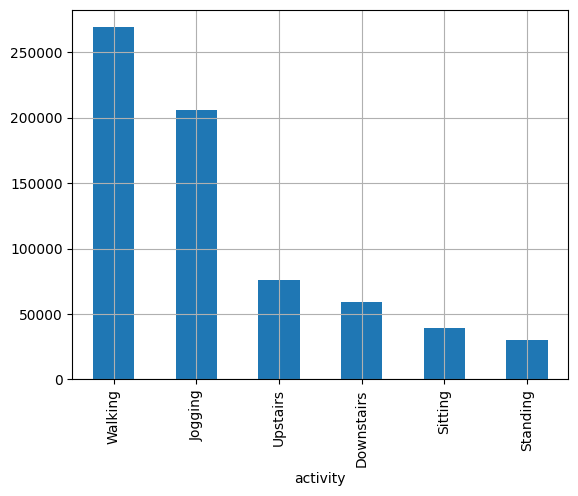

activity
Walking       269100
Jogging       205592
Upstairs       76114
Downstairs     59253
Sitting        39143
Standing       29982
Name: count, dtype: int64


In [11]:
activity_stats = df.activity.value_counts()
activities = activity_stats.index.tolist()
activity_stats.plot(kind='bar')
plt.grid()
plt.show()
print(activity_stats)

In [12]:
pd.crosstab(df.user, df.activity)

activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
user,,,,,,
1,2941,11056,0,0,3120,12861
2,0,11786,0,0,0,11739
3,3326,11018,1609,2824,3411,12970
4,1761,895,1257,0,1377,6079
5,3281,6405,1664,1515,3387,12257
6,1431,10961,1679,709,1661,12262
7,2257,9183,2529,2364,3601,11033
8,3345,10313,2699,3269,4453,17108
9,0,0,0,0,0,12923


# Time Series Plots

In [17]:
sel_user = 3
df_user = df[df.user==sel_user]

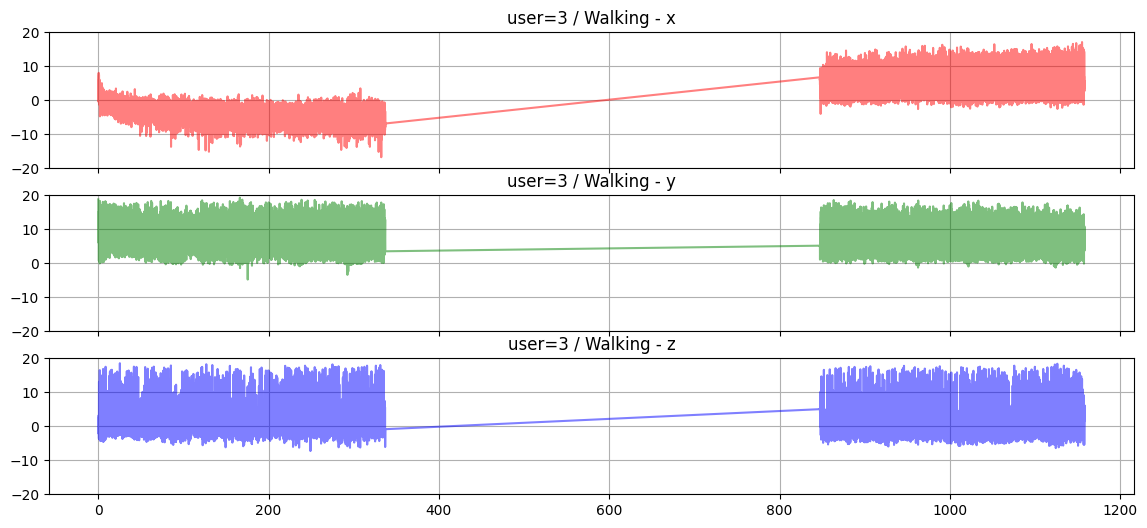

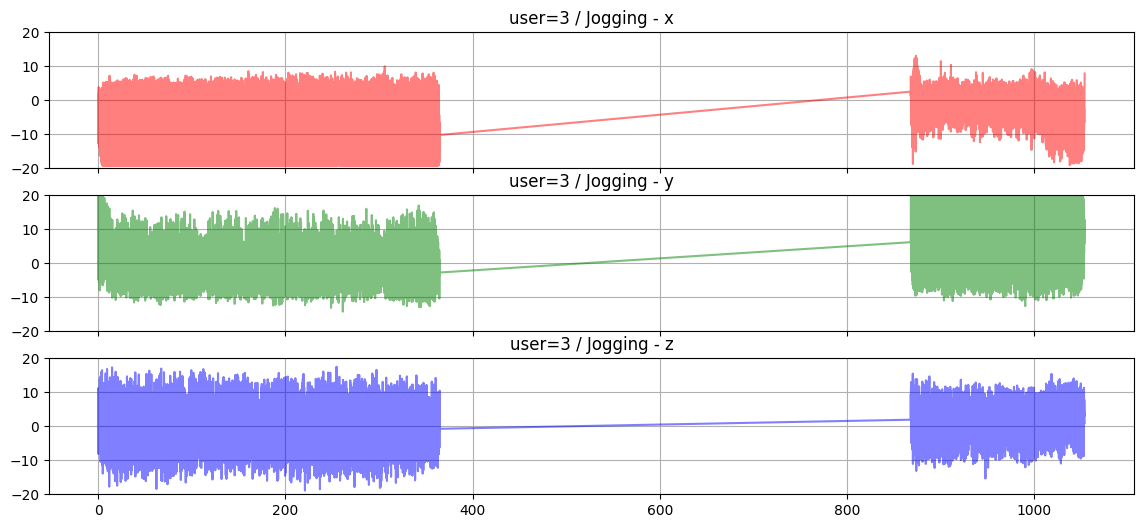

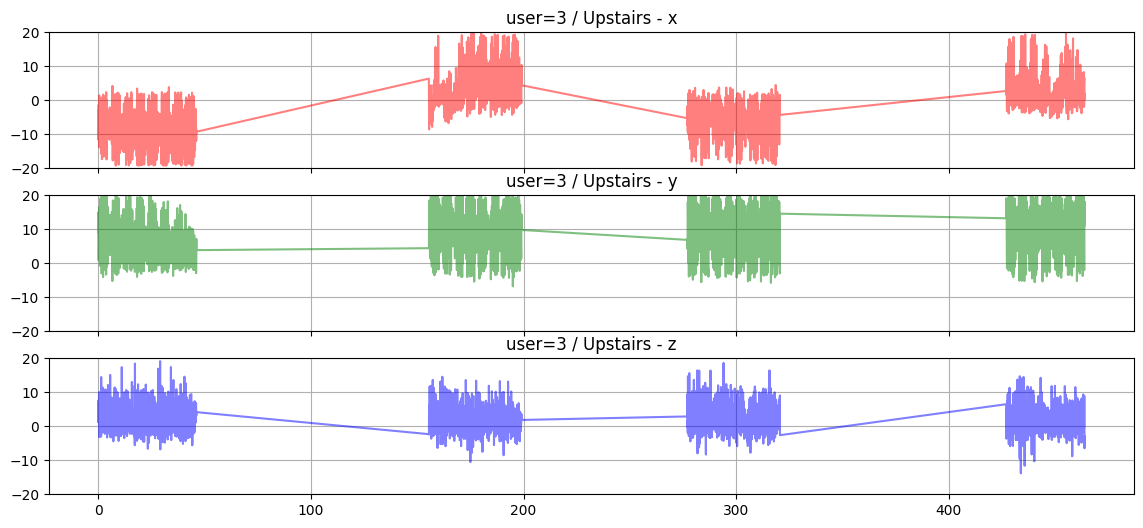

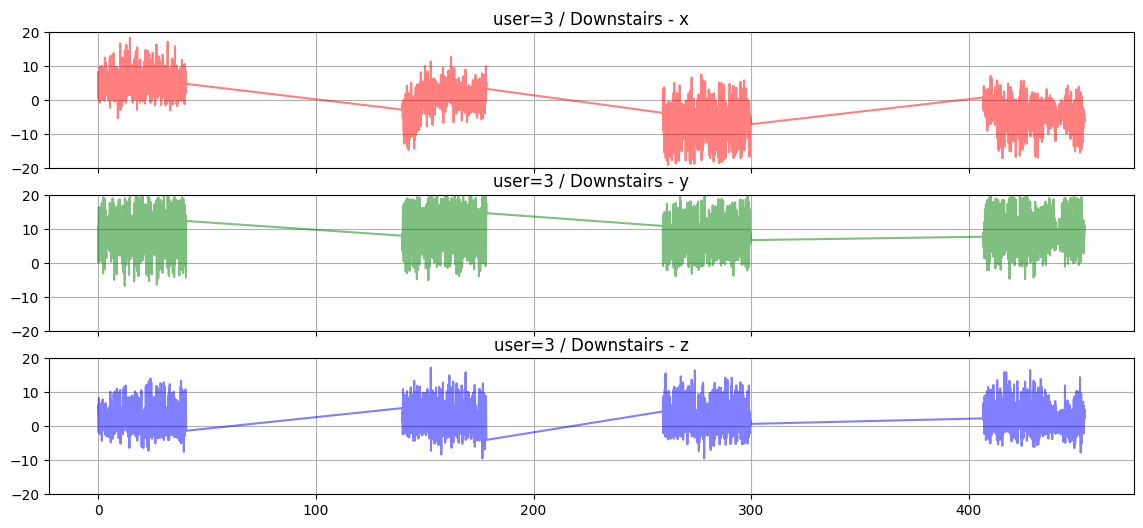

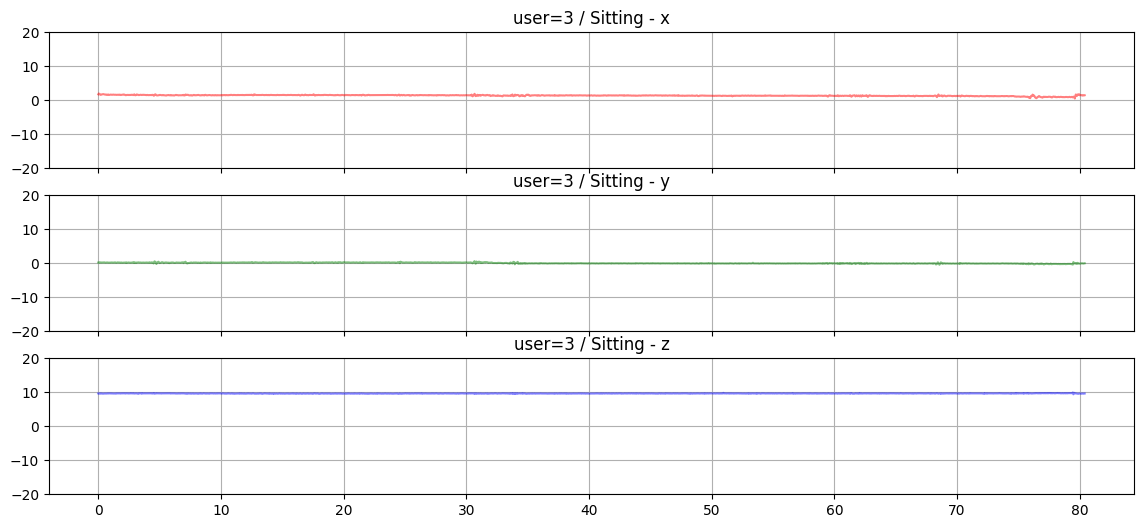

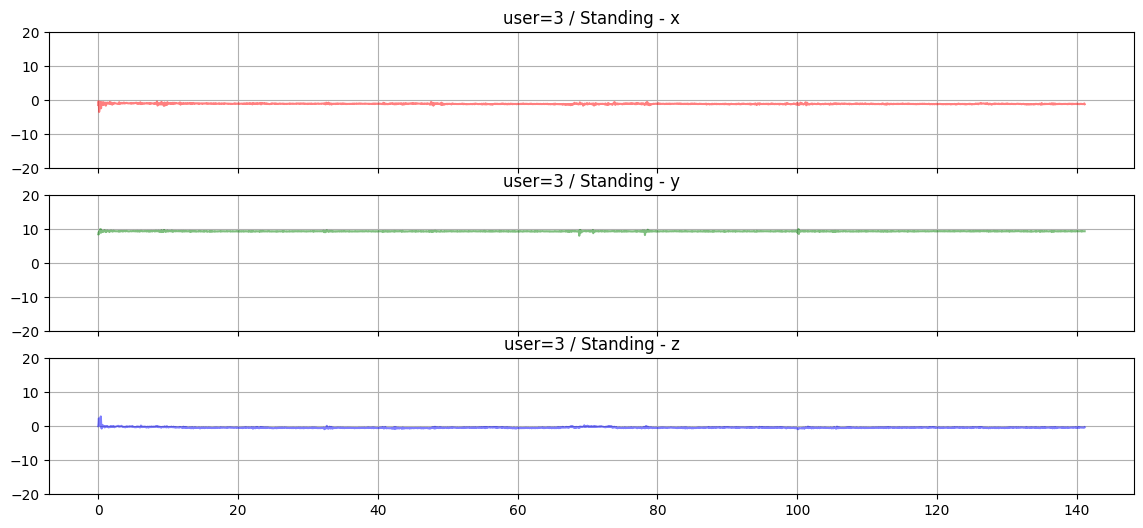

In [18]:
for act in activities:
    # Filter and reset data for the current activity
    df_temp = df_user[df_user.activity == act].copy()
    df_temp.reset_index(drop=True, inplace=True)

    # Convert timestamp to seconds relative to the start
    t_min = df_temp.timestamp.min()
    df_temp['time_sec'] = (df_temp['timestamp'] - t_min) / 1e9

    # Create subplots for x, y, and z axes
    fig, axes = plt.subplots(3, 1, figsize=(14, 6), sharex=True)
    colors = ['red', 'green', 'blue']
    labels = ['x', 'y', 'z']

    for i, ax in enumerate(axes):
        axis_label = f"{labels[i]}-axis"
        ax.plot(df_temp['time_sec'], df_temp[axis_label], color=colors[i], alpha=0.5)
        ax.set_ylim(-20, 20)
        ax.set_title(f'user={sel_user} / {act} - {labels[i]}')
        ax.grid()

    plt.show()


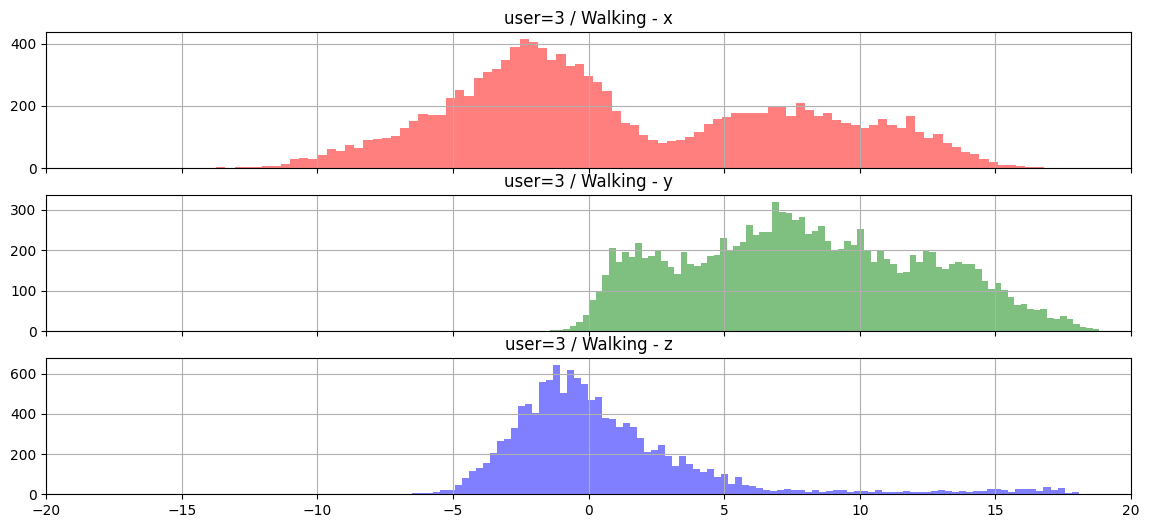

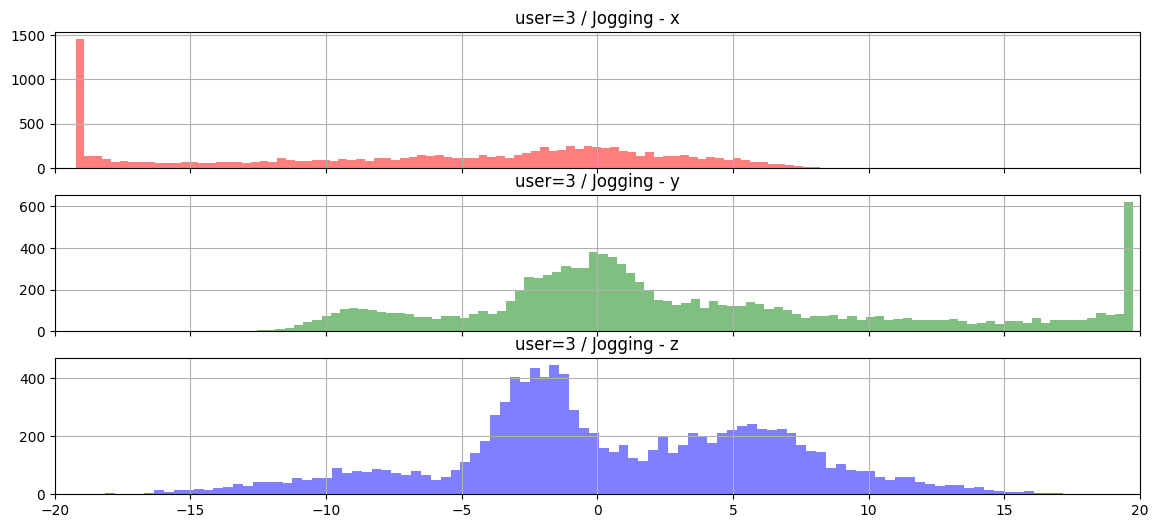

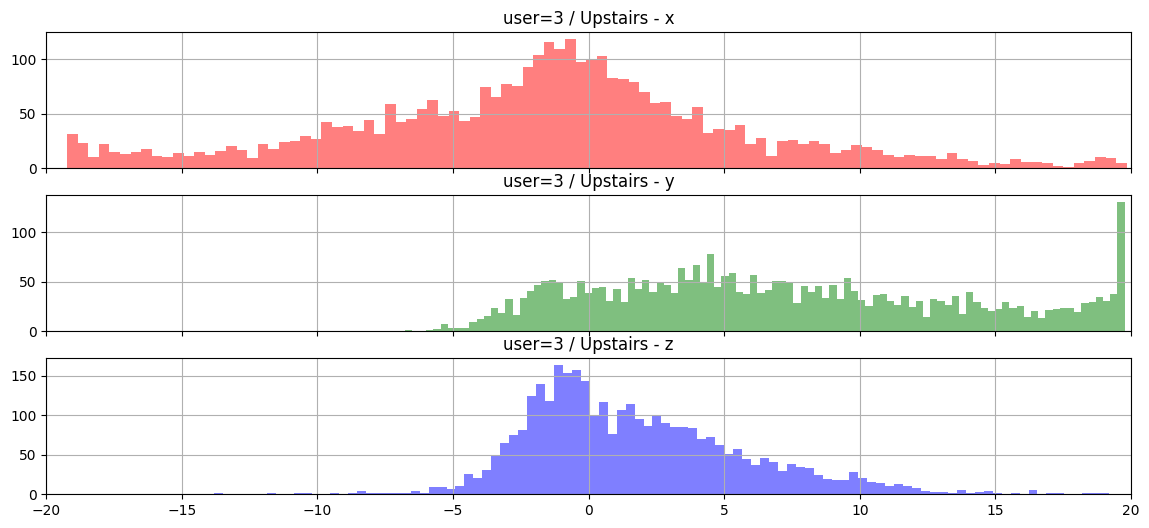

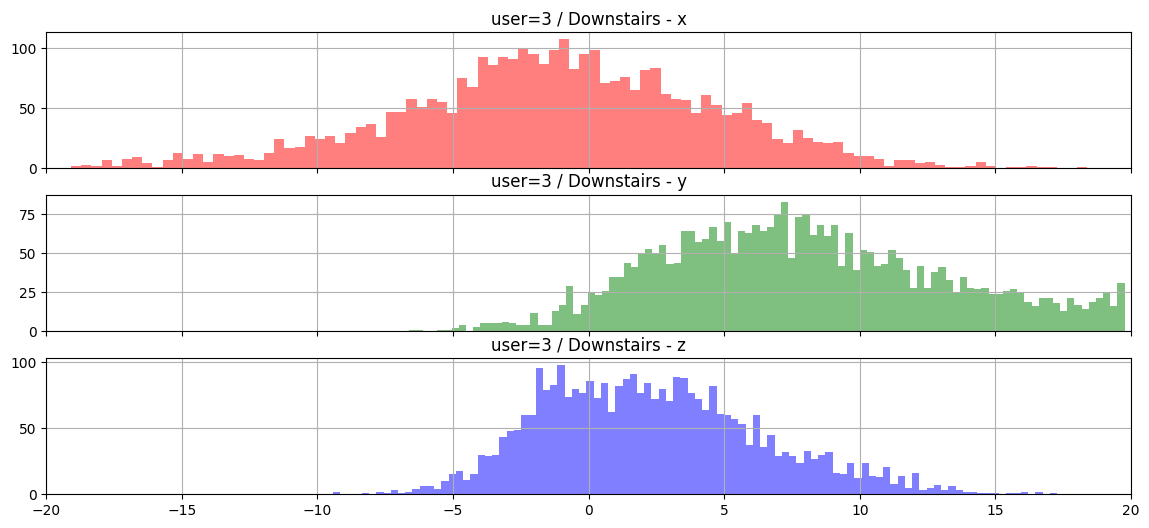

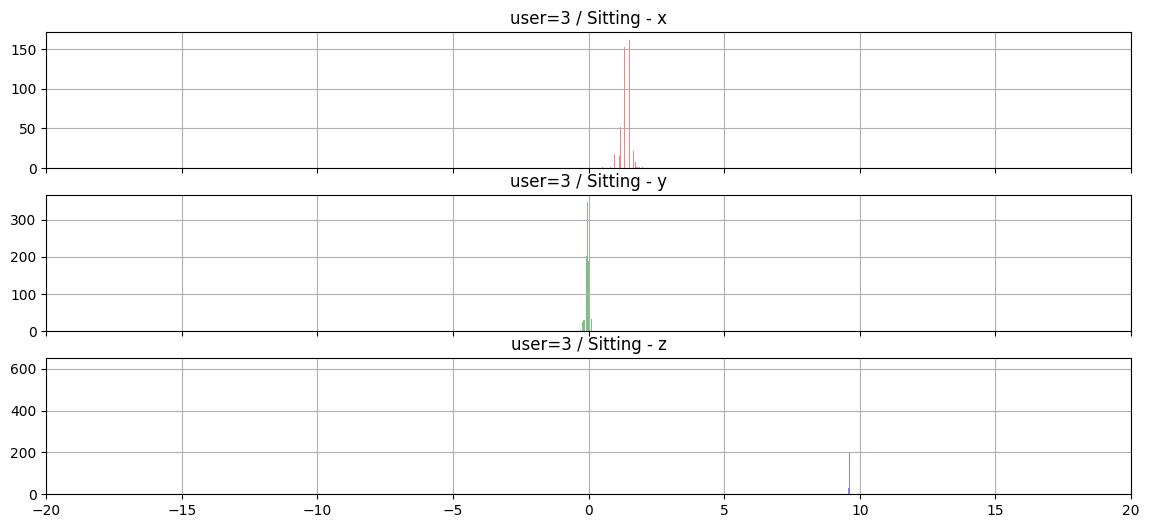

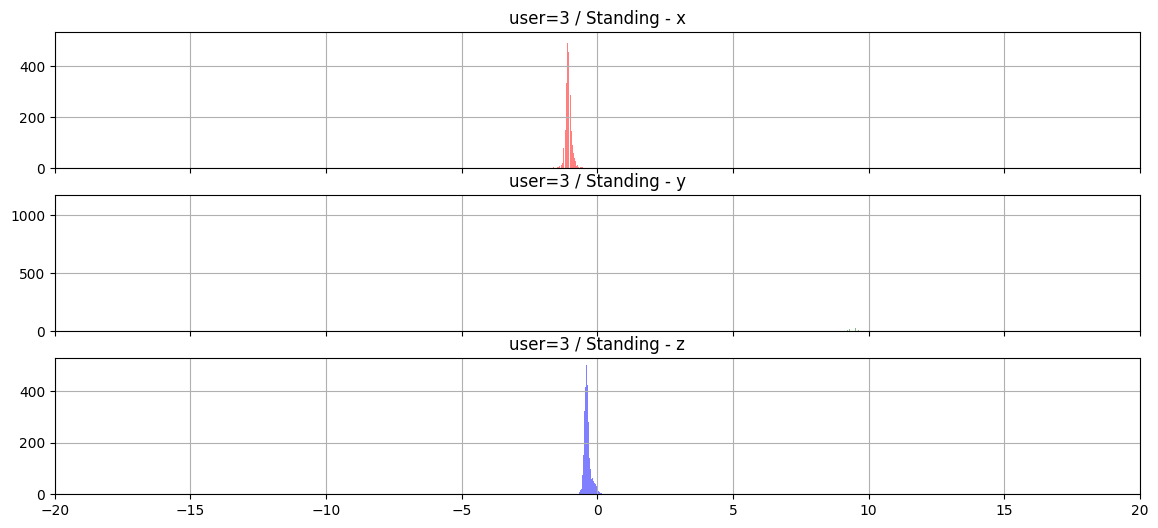

In [19]:
# distribution plots
n_bins = 100

for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)

    ax1.hist(df_temp['x-axis'], bins=n_bins, color='red', alpha=0.5)
    ax1.set_xlim(-20,20)
    ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()

    ax2.hist(df_temp['y-axis'], bins=n_bins, color='green', alpha=0.5)
    ax2.set_xlim(-20,20)
    ax2.set_title('user=' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.hist(df_temp['z-axis'], bins=n_bins, color='blue', alpha=0.5)
    ax3.set_xlim(-20,20)
    ax3.set_title('user=' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()

    plt.show()

Walking :


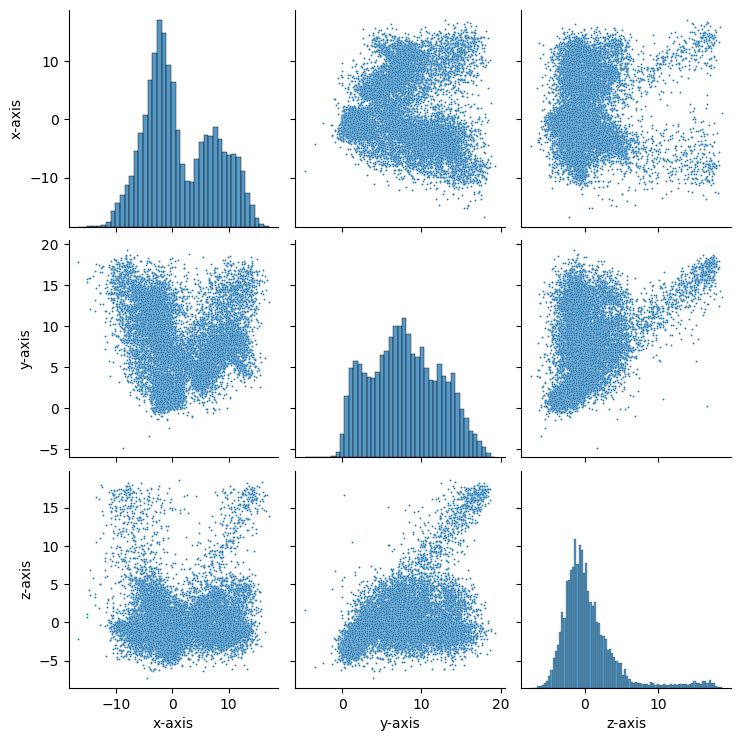

Jogging :


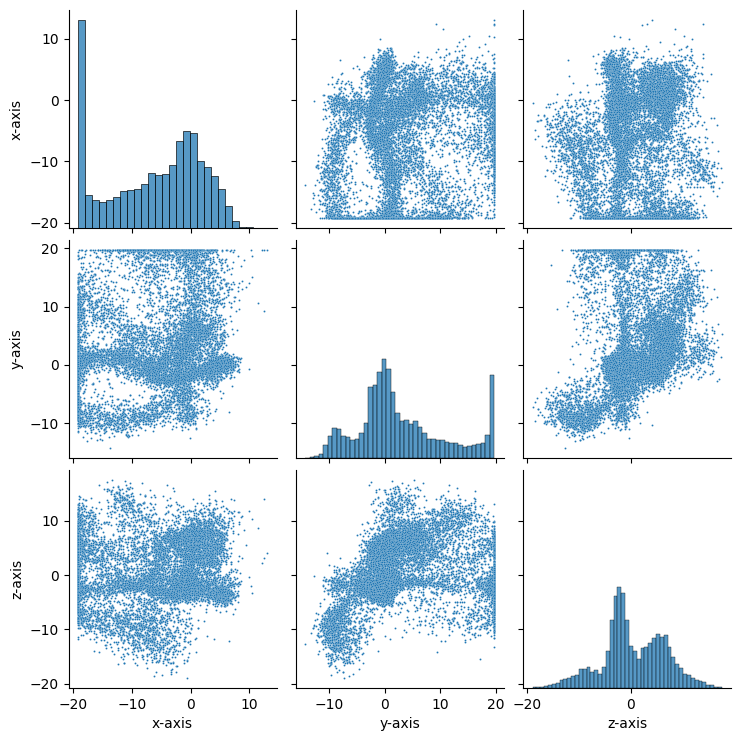

Upstairs :


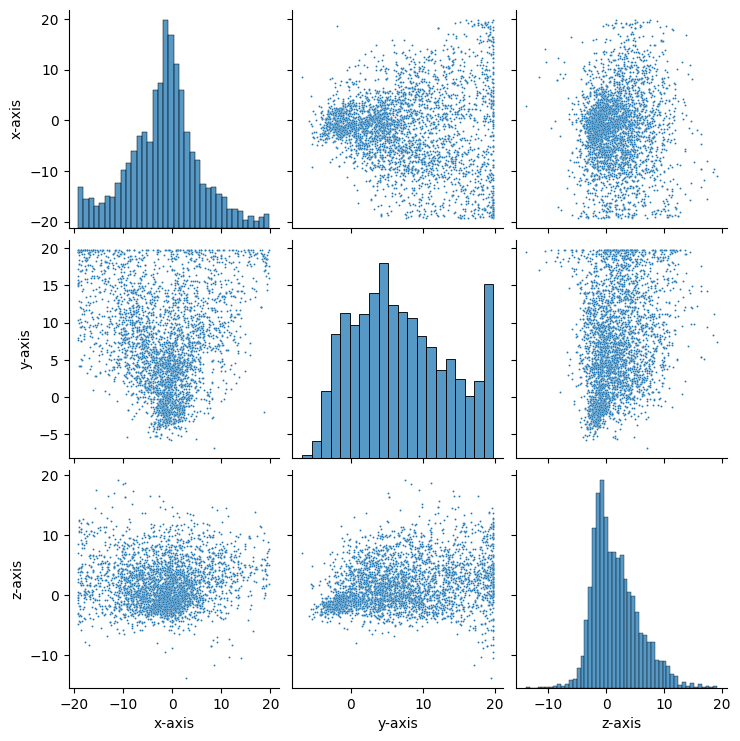

Downstairs :


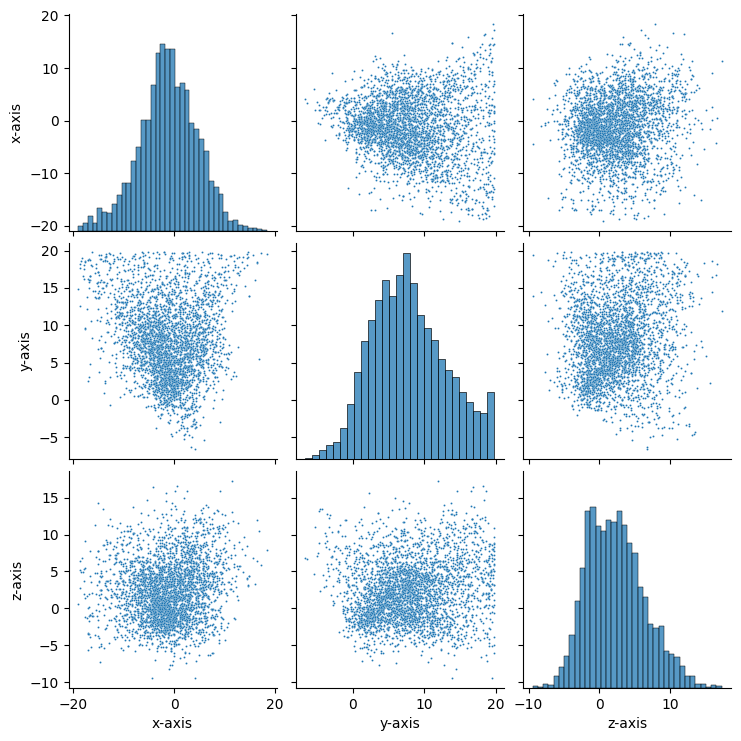

Sitting :


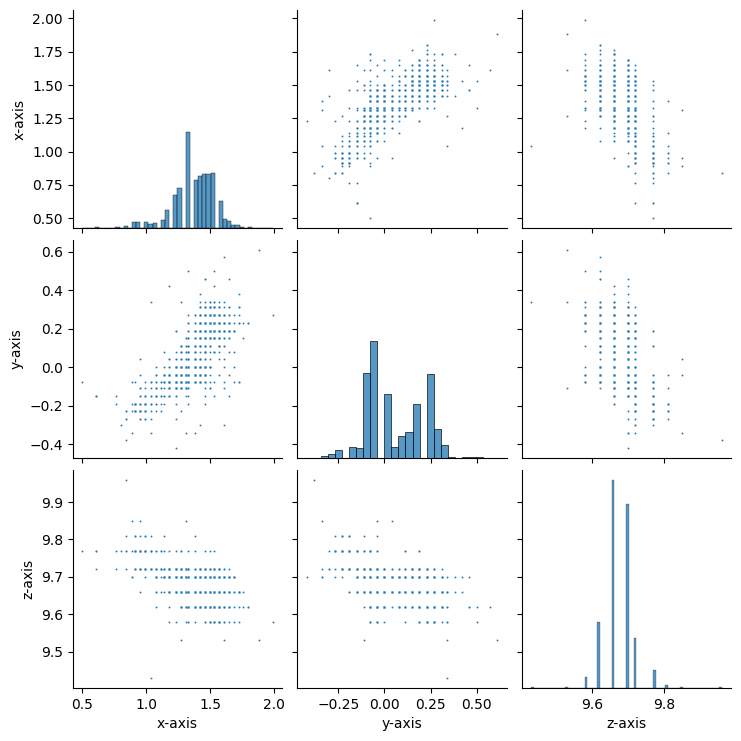

Standing :


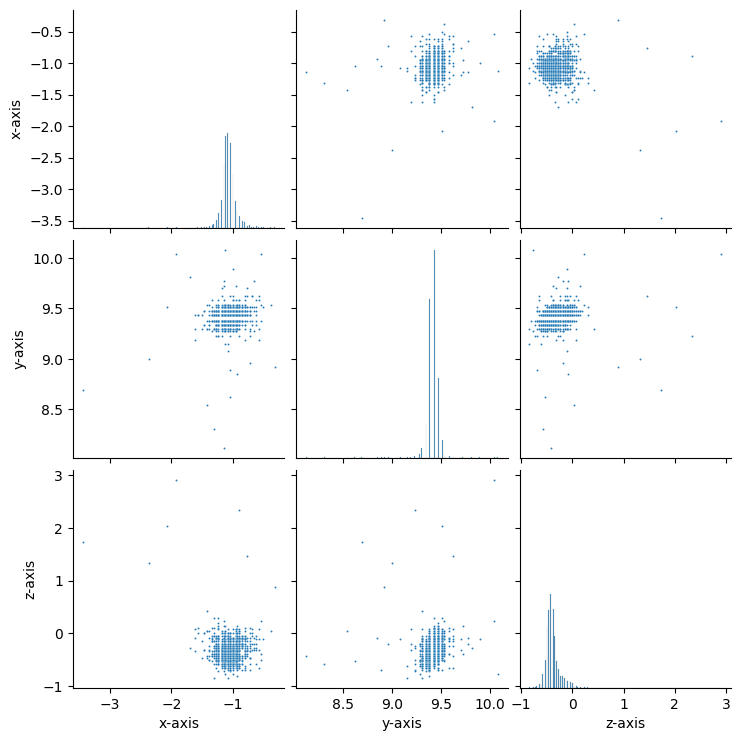

In [20]:
#scatter plots
for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)

    # convert time to seconds and start with 0
    t_min = df_temp.timestamp.min()
    df_temp['time_sec'] = (df_temp['timestamp'] - t_min)/1e9

    print(act,':')
    sns.pairplot(data = df_temp[['x-axis','y-axis','z-axis']],
                 plot_kws = dict(s=2))
    plt.show()

In [21]:
stats_by_act = df_user.groupby('activity')[['x-axis','y-axis','z-axis']].std()
stats_by_act

,x-axis,y-axis,z-axis
activity,,,
Downstairs,5.771033,5.208307,4.069624
Jogging,8.114999,7.966063,6.021514
Sitting,0.163183,0.149645,0.040073
Standing,0.125622,0.073809,0.175041
Upstairs,7.321590,6.639742,3.980631
Walking,6.186944,4.394928,3.907049


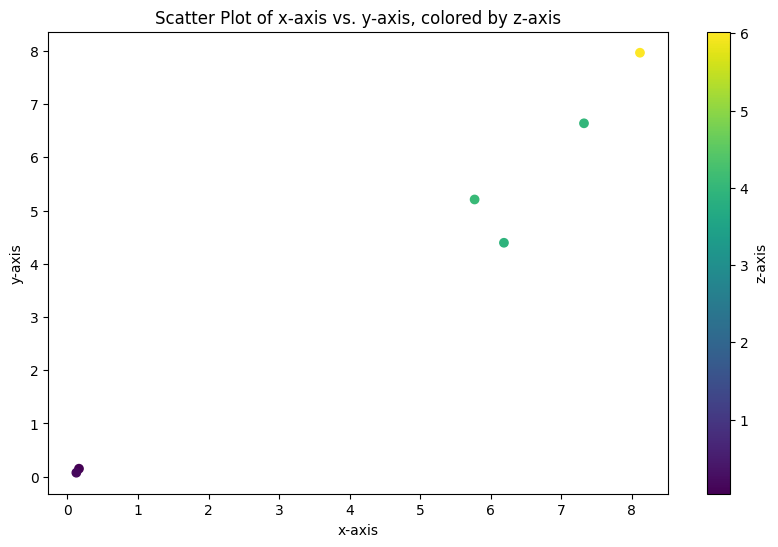

In [24]:

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(stats_by_act['x-axis'], stats_by_act['y-axis'], c=stats_by_act['z-axis'], cmap='viridis')  # Use z-axis for color
plt.colorbar(label='z-axis')

# Add labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Plot of x-axis vs. y-axis, colored by z-axis')


# Show the plot
plt.show()


# heatmap

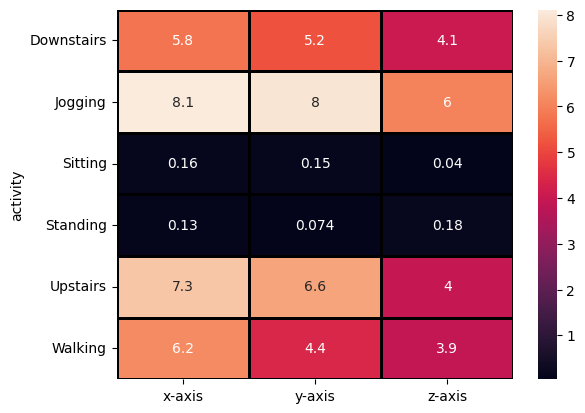

In [27]:
sns.heatmap(stats_by_act, annot=True, linewidths=1, linecolor='black')
plt.show()

# all users

In [28]:
stats_full = df.groupby(['activity','user'],
                        as_index=False)[['x-axis','y-axis','z-axis']].std()

In [29]:
# show full output
pd.set_option('display.max_rows', 200)
stats_full

,activity,user,x-axis,y-axis,z-axis
0,Downstairs,1,8.061251,4.761467,3.978546
1,Downstairs,3,5.771033,5.208307,4.069624
2,Downstairs,4,4.149014,3.826414,3.752217
3,Downstairs,5,3.119087,4.166938,2.693416
4,Downstairs,6,2.716701,3.754298,2.130593
5,Downstairs,7,5.157740,5.033377,2.810944
6,Downstairs,8,5.329682,4.501764,2.855786
7,Downstairs,10,3.576326,4.185330,4.212609
8,Downstairs,11,3.725861,9.745773,2.363278
9,Downstairs,12,3.813784,5.480537,4.657947


In [30]:
fig = px.scatter_3d(data_frame=stats_full,
                    x='x-axis', y='y-axis', z='z-axis',
                    color='activity',
                    opacity=0.25)
fig.update_layout(title='')
fig.show()

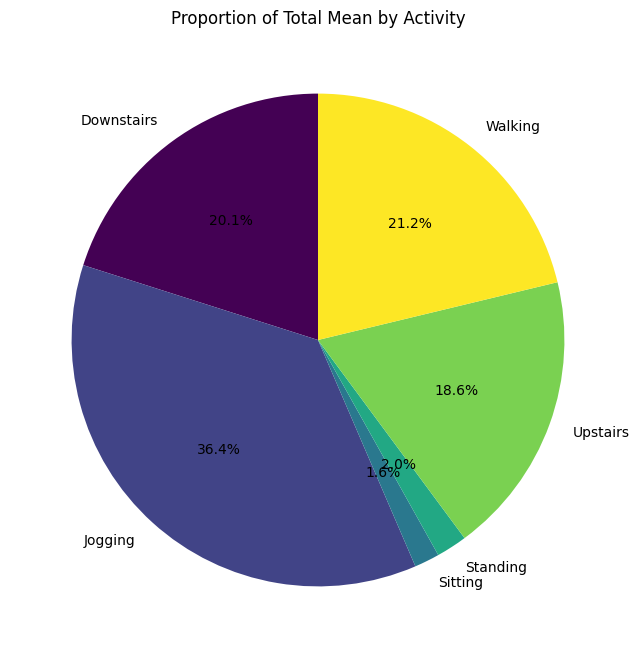

In [32]:
# Calculate the total mean value for each activity
activity_totals = stats_full_mean_std.sum(axis=1)

# Create a pie chart
plt.figure(figsize=(8, 8))
activity_totals.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')

# Add title
plt.title('Proportion of Total Mean by Activity')
plt.ylabel('')  # Hide y-axis label
plt.show()


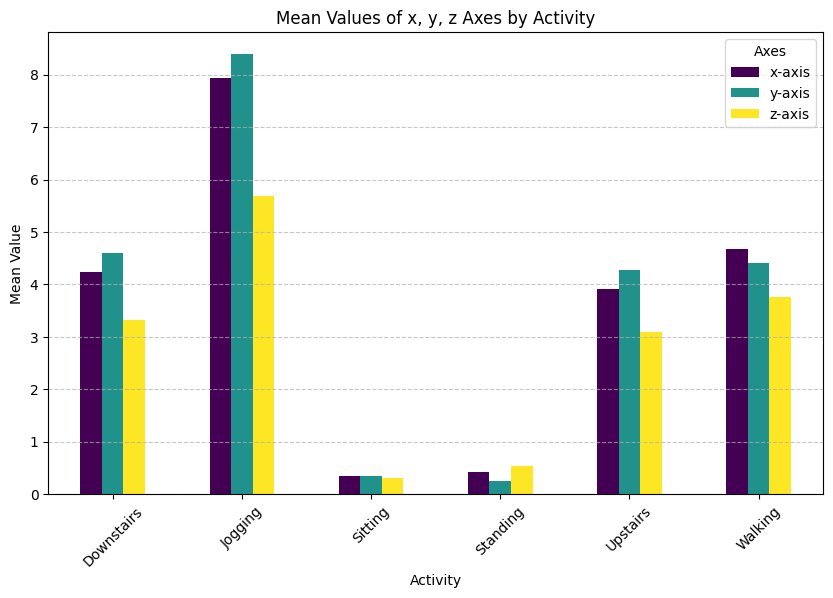

In [33]:
# Create a bar plot for mean values grouped by activity
stats_full_mean_std.plot(kind='bar', figsize=(10, 6), cmap='viridis')

# Add titles and labels
plt.title('Mean Values of x, y, z Axes by Activity')
plt.xlabel('Activity')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Axes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [31]:
stats_full_mean_std = stats_full.groupby('activity')[['x-axis','y-axis','z-axis']].mean()
stats_full_mean_std

,x-axis,y-axis,z-axis
activity,,,
Downstairs,4.229056,4.605103,3.320077
Jogging,7.930996,8.394147,5.689973
Sitting,0.352765,0.337049,0.307518
Standing,0.422372,0.254281,0.545774
Upstairs,3.905888,4.267798,3.100571
Walking,4.684815,4.406076,3.756418


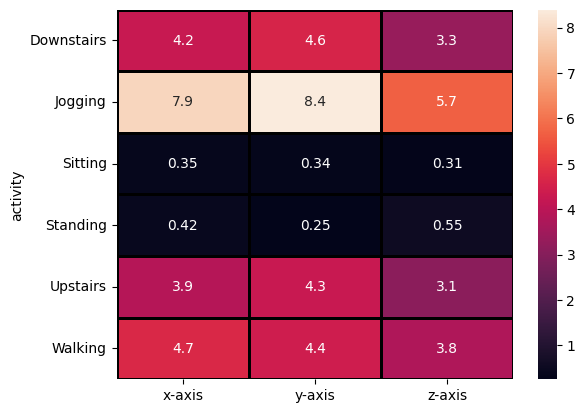

In [34]:
sns.heatmap(stats_full_mean_std,
            annot=True, linewidths=1, linecolor='black')
plt.show()

# ML


In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['activity'] = le.fit_transform(df['activity'])

In [36]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df[['x-axis', 'y-axis', 'z-axis']]  # Sensor data
y = df['activity']                     # Labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.66


# save model

In [39]:
import joblib

# Save the model
joblib.dump(clf, 'activity_recognition_model.pkl')

# Load the model
clf_loaded = joblib.load('activity_recognition_model.pkl')
